<a href="https://colab.research.google.com/github/jman4162/Three-Body-Problem-Simulator/blob/main/Three_Body_Problem_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Three-Body Problem Simulator

Name: John Hodge

This notebook provides a tutorial on simulating and analyzing the three-body problem using Python. We’ll cover the underlying physics, the equations of motion, numerical methods for solving these equations, and finally visualize the results. The target audience is individuals with a background in classical mechanics, ordinary differential equations, and some familiarity with Python and libraries like NumPy and Matplotlib.

## Contents
1. Introduction to the Three-Body Problem
2. Equations of Motion
3. Numerical Integration Techniques
4. Setting Up the Python Environment
5. Implementation Step-by-Step
   - Defining Constants and Initial Conditions
   - Writing the Equations of Motion as ODEs
   - Implementing the Numerical Integrator
   - Visualizing the Results
6. Example: The Sun-Earth-Moon System (Simplified)
7. Further Considerations and Advanced Topics
8. Complete Code Example

---

### 1. Introduction to the Three-Body Problem

The three-body problem involves predicting the motion of three massive bodies that interact only through their mutual gravitational attractions. Unlike the two-body problem (for which there is a closed-form solution known from Kepler’s laws and Newton’s law of gravitation), the three-body problem does not, in general, have a closed-form solution. The system often exhibits chaotic behavior, making long-term predictions very sensitive to initial conditions.

Common examples:
- Three stars orbiting their common center of mass.
- The Sun, Earth, and Moon system (though the Sun’s mass often simplifies this to a restricted three-body problem).
- Asteroids influenced by both the Sun and Jupiter.

Key points:
- The three-body problem is governed by Newton’s second law and the universal law of gravitation.
- The motion is described by a set of coupled, nonlinear second-order ordinary differential equations (ODEs).

---

### 2. Equations of Motion

Consider three bodies with masses $m_1$, $m_2$, and $m_3$. Let their position vectors be:

$$\mathbf{r}_1 = (x_1, y_1, z_1), \quad \mathbf{r}_2 = (x_2, y_2, z_2), \quad \mathbf{r}_3 = (x_3, y_3, z_3).$$

Newton’s law of gravitation states the force on body 1 due to body 2 and 3 is:
$$
\mathbf{F}_1 = -G m_1 m_2 \frac{\mathbf{r}_1 - \mathbf{r}_2}{|\mathbf{r}_1 - \mathbf{r}_2|^3} - G m_1 m_3 \frac{\mathbf{r}_1 - \mathbf{r}_3}{|\mathbf{r}_1 - \mathbf{r}_3|^3}.
$$

From Newton’s second law, $\mathbf{F} = m \mathbf{a}$, we get:
$$
\mathbf{a}_1 = \frac{\mathbf{F}_1}{m_1} = -G m_2 \frac{\mathbf{r}_1 - \mathbf{r}_2}{|\mathbf{r}_1 - \mathbf{r}_2|^3} - G m_3 \frac{\mathbf{r}_1 - \mathbf{r}_3}{|\mathbf{r}_1 - \mathbf{r}_3|^3}.
$$

Similarly:
$$
\mathbf{a}_2 = -G m_1 \frac{\mathbf{r}_2 - \mathbf{r}_1}{|\mathbf{r}_2 - \mathbf{r}_1|^3} - G m_3 \frac{\mathbf{r}_2 - \mathbf{r}_3}{|\mathbf{r}_2 - \mathbf{r}_3|^3},
$$
$$
\mathbf{a}_3 = -G m_1 \frac{\mathbf{r}_3 - \mathbf{r}_1}{|\mathbf{r}_3 - \mathbf{r}_1|^3} - G m_2 \frac{\mathbf{r}_3 - \mathbf{r}_2}{|\mathbf{r}_3 - \mathbf{r}_2|^3}.
$$

These form a system of six coupled second-order ODEs (two for each dimension per body; if you consider a 3D setup, it would be nine second-order ODEs). Typically, we rewrite this system as first-order ODEs by defining velocity components:
$$
\frac{d\mathbf{r}_i}{dt} = \mathbf{v}_i, \quad \frac{d\mathbf{v}_i}{dt} = \mathbf{a}_i.
$$

---

### 3. Numerical Integration Techniques

For nonlinear ODEs like the three-body problem, we rely on numerical integration. Common methods include:

- **Runge-Kutta (RK4)**: A classic, explicit method suitable for many ODE problems.
- **Adaptive time-step solvers**: Such as SciPy’s `solve_ivp` with methods like `RK45` or `DOP853` that adjust the step size for accuracy and efficiency.

We will use Python’s `scipy.integrate.solve_ivp` which provides a robust and convenient interface.

---

### 4. Setting Up the Python Environment

Ensure you have the following packages installed:

```bash
pip install numpy scipy matplotlib
```

---

### 5. Implementation Step-by-Step

#### (a) Defining Constants and Initial Conditions

We need gravitational constant $G$, masses, and initial positions and velocities of the three bodies. For simplicity, we’ll consider a 2D problem (motion in the xy-plane) to facilitate visualization.

- **Masses**: Assume arbitrary values or real-world approximations.
- **Initial positions and velocities**: Carefully chosen to produce interesting dynamics. For example, we can start all three bodies in some initial configuration with small perturbations.

#### (b) Writing the Equations of Motion as ODEs

We’ll write a function `three_body_equations(t, state, G, m1, m2, m3)` that takes the current time `t`, the current state vector `state`, and returns the time derivatives of positions and velocities.

The `state` vector for a 2D three-body system can be:
$$
state = [x_1, y_1, x_2, y_2, x_3, y_3, v_{x1}, v_{y1}, v_{x2}, v_{y2}, v_{x3}, v_{y3}]
$$

We need to return:
$$
\frac{dx_1}{dt}, \frac{dy_1}{dt}, \frac{dx_2}{dt}, \frac{dy_2}{dt}, \frac{dx_3}{dt}, \frac{dy_3}{dt}, \frac{dv_{x1}}{dt}, \frac{dv_{y1}}{dt}, \frac{dv_{x2}}{dt}, \frac{dv_{y2}}{dt}, \frac{dv_{x3}}{dt}, \frac{dv_{y3}}{dt}
$$

#### (c) Implementing the Numerical Integrator

Use `solve_ivp` to integrate from `t=0` to some `t_final`. Choose a suitable timespan and time resolution. For chaotic systems, you may need a fine time resolution.

#### (d) Visualizing the Results

Use Matplotlib to plot the trajectories of the three bodies. Plotting the path lines and possibly animate the result by iterating over time steps can give a better understanding of the dynamics.

---

### 6. Example: The Sun-Earth-Moon System (Simplified)

As a simplified test, we can model:
- `m1` = mass of the Sun (large)
- `m2` = mass of the Earth
- `m3` = mass of the Moon

We’ll start the system at some initial configuration approximating a stable Earth orbit and a Moon orbiting Earth. This will not be perfectly accurate, but it illustrates the point.

---

### 7. Further Considerations and Advanced Topics

- **Stability and Chaos**: The three-body problem is highly sensitive to initial conditions. Tiny changes can lead to vastly different outcomes over time.
- **Restricted Three-Body Problem**: If one mass is negligible compared to the other two, we can simplify the equations (like a spacecraft in the Earth-Moon system).
- **Dimensionality**: While we focused on 2D for visualization, real three-body systems are inherently 3D.
- **Symplectic Integrators**: For long-term stability, you may consider symplectic methods that conserve energy better over long integrations.

---

### 8. Complete Code Example

In [4]:
!pip install -q numpy scipy matplotlib

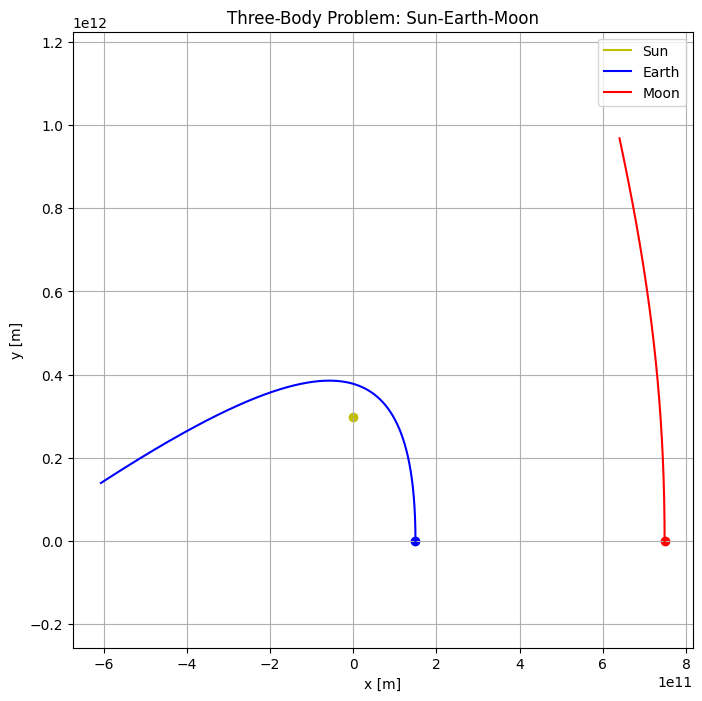

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Gravitational constant
G = 6.67430e-11

# Define masses (for demonstration, somewhat realistic scales)
m_sun = 1.989e30
m_earth = 5.972e24
m_moon = 7.3477e22

def three_body_equations(t, state, G, m1, m2, m3):
    # Unpack state vector
    x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3 = state
    # Positions as vectors
    r1 = np.array([x1, y1])
    r2 = np.array([x2, y2])
    r3 = np.array([x3, y3])
    # Distances
    r12 = r1 - r2
    r13 = r1 - r3
    r23 = r2 - r3
    dist12 = np.linalg.norm(r12)
    dist13 = np.linalg.norm(r13)
    dist23 = np.linalg.norm(r23)
    # Accelerations
    a1 = -G * m2 * r12 / dist12**3 - G * m3 * r13 / dist13**3
    a2 = -G * m1 * (-r12) / dist12**3 - G * m3 * (r2 - r3) / dist23**3
    a3 = -G * m1 * (-r13) / dist13**3 - G * m2 * (-r23) / dist23**3

    # Return derivatives
    return [vx1, vy1, vx2, vy2, vx3, vy3, a1[0], a1[1], a2[0], a2[1], a3[0], a3[1]]

# Initial conditions
# For simplicity, place the Sun at the origin, Earth at ~1 AU on x-axis, Moon near Earth.
# Assume circular orbits, roughly:
AU = 1.496e11  # 1 Astronomical Unit in meters
x1_0, y1_0 = 0.0, 2*AU
x2_0, y2_0 = AU, 0.0
x3_0, y3_0 = 5*AU + 3.84e8, 0.0  # Moon ~384,400 km from Earth

# Orbital velocities (approximate)
# Earth’s orbital speed around Sun ~29.78 km/s
vx1_0, vy1_0 = 0.0, 0.0
vx2_0, vy2_0 = 0.0, 29.78e3

# Moon’s orbital speed around Earth ~1.022 km/s (but both are orbiting the Sun)
vx3_0, vy3_0 = 0.0, 29.78e3 + 1.022e3
state0 = [x1_0, y1_0, x2_0, y2_0, x3_0, y3_0, vx1_0, vy1_0, vx2_0, vy2_0, vx3_0, vy3_0]

# Time span for the integration: One year ~ 3.154e7 s
t_span = (0, 3.154e7)
t_eval = np.linspace(t_span[0], t_span[1], 2000)
sol = solve_ivp(three_body_equations, t_span, state0, args=(G, m_sun, m_earth, m_moon), t_eval=t_eval, rtol=1e-9, atol=1e-9)

# Extract solution
x1_sol = sol.y[0]
y1_sol = sol.y[1]
x2_sol = sol.y[2]
y2_sol = sol.y[3]
x3_sol = sol.y[4]
y3_sol = sol.y[5]

# Plot trajectories
plt.figure(figsize=(8,8))
plt.plot(x1_sol, y1_sol, 'y', label='Sun')
plt.plot(x2_sol, y2_sol, 'b', label='Earth')
plt.plot(x3_sol, y3_sol, 'r', label='Moon')
plt.scatter(x1_sol[0], y1_sol[0], color='y', marker='o')  # initial positions
plt.scatter(x2_sol[0], y2_sol[0], color='b', marker='o')
plt.scatter(x3_sol[0], y3_sol[0], color='r', marker='o')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Three-Body Problem: Sun-Earth-Moon')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Final Remarks

This tutorial provides a starting point for simulating the three-body problem. By adjusting masses, initial conditions, or expanding to three dimensions, you can explore a rich variety of behaviors. The three-body problem remains an active area of mathematical and astronomical research, with countless fascinating patterns and chaotic trajectories waiting to be discovered.